In [2]:
#Exploring One-Dimensional Data

from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt 

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucke_size"""
    return bucket_size * math.floor(point/ bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how mnay in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    

In [3]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

#uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range (10000)]

#normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]


<Figure size 432x288 with 0 Axes>

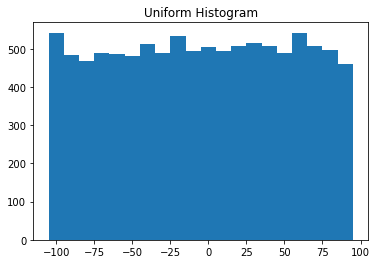

In [4]:
plot_histogram(uniform, 10, "Uniform Histogram")

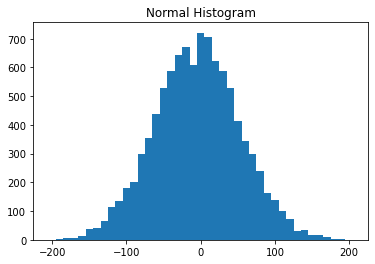

In [5]:
plot_histogram(normal, 10, "Normal Histogram")

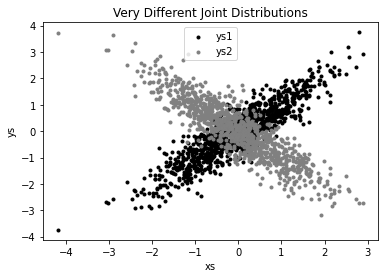

In [6]:
#Two Dimensions

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

0.9010493686379609
-0.8920981526880033


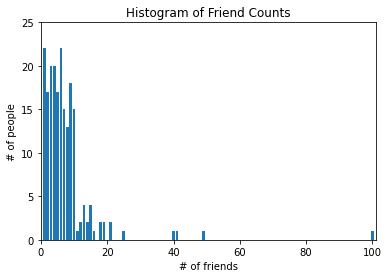

In [7]:
from scratch.statistics import correlation

print(correlation(xs, ys1))     #about 0.9
print(correlation(xs, ys2))     #about -0.9

In [8]:
#Many Dimensions

from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """Returns the len(data) x len(data) matrix whose (i,j)'th entry is the correlation between data[i] and data[j]"""
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)



In [9]:
corr_data = 

SyntaxError: invalid syntax (<ipython-input-9-58f72cb09991>, line 1)

In [ ]:
#corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplot(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        #Scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        #unless i == j, in which case show the series name
        else: ax[i][j].annotates("series " + str(i), (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

        #Then hid axis label except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

#Fix the bottom-right and top-left axis labels, which are wrong because their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [ ]:
#Using NamedTuples

import datetime
stock_price = {'closing_price' : 102.06,
                'date' : datetime.date(2020, 11, 11),
                'symbol' : "AAPL"}
#inefficient representation (Dont do this)

stock_price['closing_price'] = 103.06

prices: Dict[datetime.date, float] = {}

In [ ]:
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018,12,14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

In [ ]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018,12,14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [ ]:
#Dataclasses

from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018,12,14), 106.03)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()


#big difference compared to others is we can modift a dataclass instance's values

#stock split
price2.closing_price /= 2
#assert price.closing_price == 53.015

price2.closing_price = 75

In [ ]:
#Cleaning and Munging

from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol = symbol,
                        date = parse(date).date(),
                        closing_price = float(closing_price))

#Now test our function
stock = parse_row(['MSFT', '2018-12-14', '106.03'])

assert stock.symbol == 'MSFT'
assert stock.date == datetime.date(2018,12,14)
assert stock.closing_price == 106.03

In [16]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    #Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    
    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

#Should return None for errors
assert try_parse_row(['MSFT0', '2018-12-14', '106.03']) is None
assert try_parse_row(['MSFT', '2018-12--14', '106.03']) is None
assert try_parse_row(['MSFT', '2018-12-14', 'x']) is None

#But should return same as before if data is good
assert try_parse_row(['MSFT', '2018-12-14', '106.03']) == stock

In [17]:
import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


In [18]:
#Manipulating Data
'''
    Suppose we want to know the highest-ever closing price for AAPL.
        1. Restrict ourselves to AAPL rows
        2. Grab the closing_price from each row
        3. Take the max of those prices
'''

max_aapl_price = max(stock_price.closing_price 
                    for stock_price in data 
                    if stock_price.symbol == 'AAPL')

In [19]:
'''
    We might want to know the highest-ever closing price for each stock in our dataset.
        1. Create a dict to keep track of highest prices (we'll use            a defaultdict that returns minus infinity for missing               values, since any price will be greater than that)
        2. Iterate over our data, update it
'''

from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price


In [20]:
'''
    What are the largest and smallest one-day percent changes in our dataset. The percent change is price_today / price-yesterday - 1, which means we need some way of associating today's price and yesterday's price. One approach is to group the prices by symbol, and then, within each group.
    1. Order the prices by date
    2. Use zip to get (previous, current) pairs
    3. Turn the pairs into new "percent change" rows
'''

from typing import List
from collections import defaultdict

#Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

'''
    Since the prices are tuples, they'll get sorted by their fields in order: first by symbol, then by date, then by price. This means that if we have some prices all with the same symbol, sort will sort them by date (and then by price, which does nothing, since we only have one per date), which is what we want.
'''

#Order the prices by date
prices = {symbol: sorted(symbol_prices)
            for symbol, symbol_prices in prices.items()}

def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    '''Assumes prices are for one stock and are in order'''
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

#Collect all changes
all_changes = [change
                for symbol_prices in prices.values()
                for change in day_over_day_changes(symbol_prices)]

#Find largest and smallest
max_change = max(all_changes, key=lambda change: change.pct_change)
'''
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997, 8, 6)
assert 0.33 < max_change.pct_change < 0.34
'''

min_change = min(all_changes, key=lambda change: change.pct_change)
'''
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000,9,29)
assert -0.52 < min_change.pct_change < -0.51
'''

"\nassert min_change.symbol == 'AAPL'\nassert min_change.date == datetime.date(2000,9,29)\nassert -0.52 < min_change.pct_change < -0.51\n"

In [21]:
'''
    Now use this new all_changes dataset to find which month is the best to invest in tech stocks. We'll just look at the average daily change daily change by month
'''
changes_by_month: List[DailyChange] = {month: [] for month in range (1,13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes) 
    for month, changes in changes_by_month.items()
}

#October is the best month
#assert avg_daily_change[10] == max(avg_daily_change.values())

ZeroDivisionError: division by zero

In [22]:
#Rescaling

#Measuring height in inches (based on table 10-1)
from scratch.linear_algebra import distance

a_to_b = distance([63, 150], [67, 160]) #10.77
a_to_c = distance([63, 150], [70, 171]) #22.14
b_to_c = distance([67, 160], [70, 171]) #11.40
#B's nearest neighbor is A

#Measuring height in centimeters (based on table 10-1)

a_to_b = distance([160 ,150], [170.2, 160])     #14.28
a_to_c = distance([160, 150], [177.8, 171])     #27.53
b_to_c = distance([170.2, 160], [177.8, 171])   #13.37

#However in centimeters B's nearest neighbor is C

#This is a problem

In [23]:
#We'll need to compute the mean and the standard_deviation for each position

from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
                for i in range(dim)]
    
    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0 , 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]


In [24]:
#Create new dataset with means and stdevs

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has mean 0 and standard deviation 1. (Leaves a position as is if its standard deviation is 0)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    #Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i] / stdevs[i])

    return rescaled

In [25]:
#Testing
vectors = [[-3, -1, 1], [-1, 0 , 1], [1, 1, 1]]
means, stdevs = scale(rescale(vectors))
print(means)
print(stdevs)
'''
assert means == [0,0,1]
assert stdevs == [1,1,0]
'''

[-0.5, 0.0, 1.0]
[2.0, 1.0, 0.0]


'\nassert means == [0,0,1]\nassert stdevs == [1,1,0]\n'

In [26]:
#An Aside: tqdm

#tqdm library generates custom progress bars

import tqdm

for i in tqdm.tqdm(range(100)):
    #do something slow
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


In [27]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            #i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

9592 primes: 100%|██████████| 99997/99997 [01:27<00:00, 1143.36it/s]


In [12]:
#Dimensionality Reduction

#First, translate the data so that each dimension has mean 0
from scratch.linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

#Find the direction that maximizes this variance, do this using gradient descent, once we have a gradient function
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """The gradient of directional variance with respect to w"""
    w_dir = direction(w)
    return [sum(2* dot(v, w_dir) * v[i] for v in data) for i in range (len(w))]

#Now the first principal component that we have is just the direction that maximizes the directional_variance function
from scratch.gradient_descent import gradient_step

def first_principal_component(data: List[Vector], n: int = 100, step_size: float = 0.1) -> Vector:
    #Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")
    
    return direction(guess)

In [14]:
#Once we've found the direction thats's the first principal comonent, we can project our data onto it to find the values of that component

from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

#If we want to find further components, we first remove the projections from the data

from scratch.linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v,w))

def remove_projection(data: List[Vector], w: [Vector]) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

In [15]:
#On a higher-dimensional dataset, we can iteratively find as many components as we want

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components 

In [16]:
#We can then transform our data into the lower-dimensional space spanned by the components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]